In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
sns.set()

In [2]:
data = pd.read_csv('train.csv')

In [3]:
cols = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']

In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

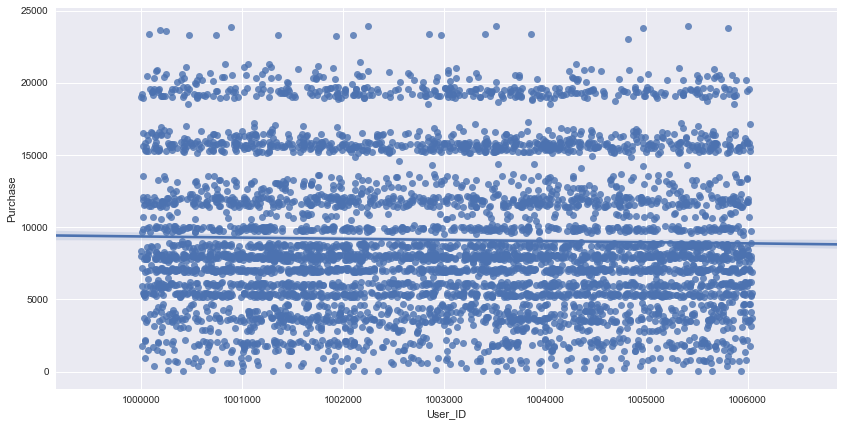

In [6]:
sns.regplot(data.loc[::100, 'User_ID'], data.loc[::100, 'Purchase'])
plt.show()

## User_ID --

In [10]:
cols.remove('User_ID')

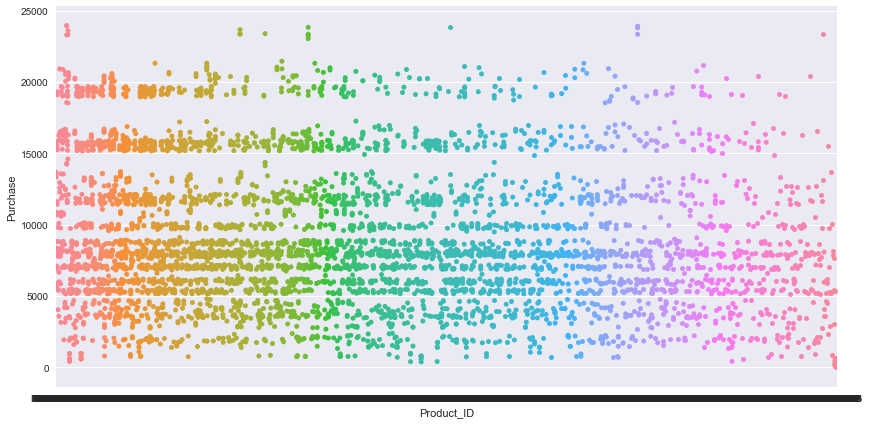

In [11]:
sns.stripplot(data.loc[::100, 'Product_ID'], data.loc[::100, 'Purchase'])
plt.show()

## Product ID++

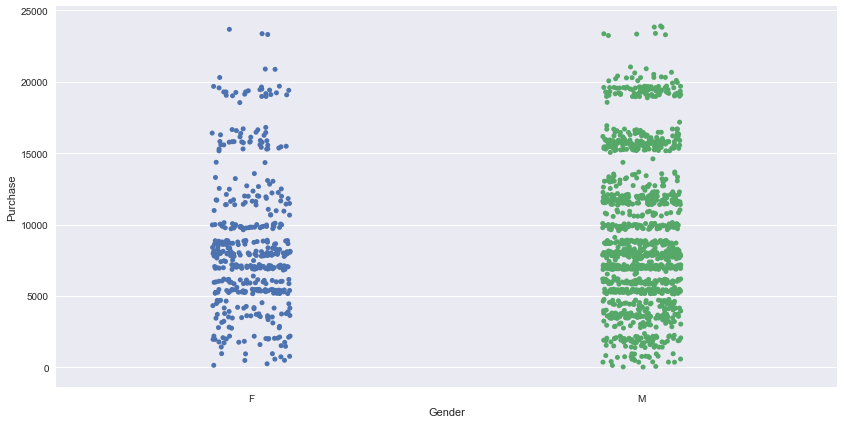

In [12]:
# sns.stripplot(data.Gender.values, data.Purchase.values, jitter=True)
sns.stripplot(data.loc[::300, 'Gender'], data.loc[::300, 'Purchase'], jitter=True)
plt.show()

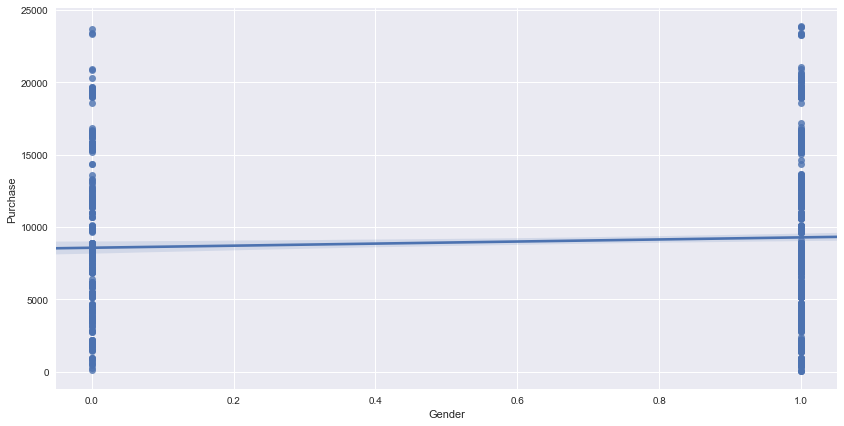

In [13]:
data.Gender = data.Gender.replace({'F':0, 'M': 1})
sns.regplot(data.loc[::300, 'Gender'], data.loc[::300, 'Purchase'])
plt.show()

## Gender ++

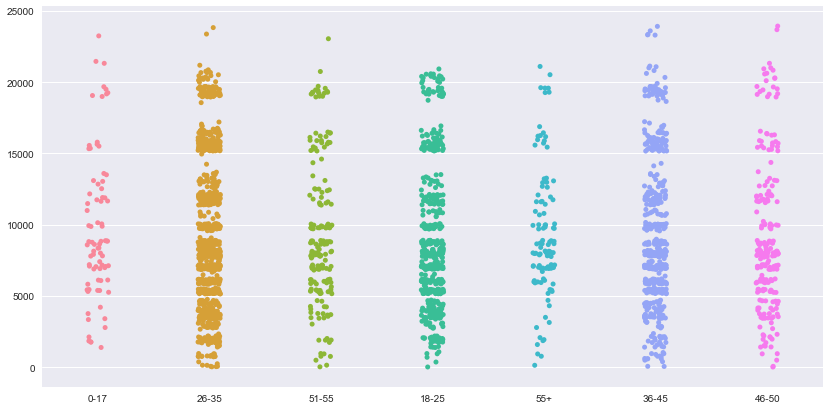

In [14]:
sns.stripplot(data.loc[::200, 'Age'].values, data.loc[::200, 'Purchase'].values, jitter=True)
plt.show()

## Age++

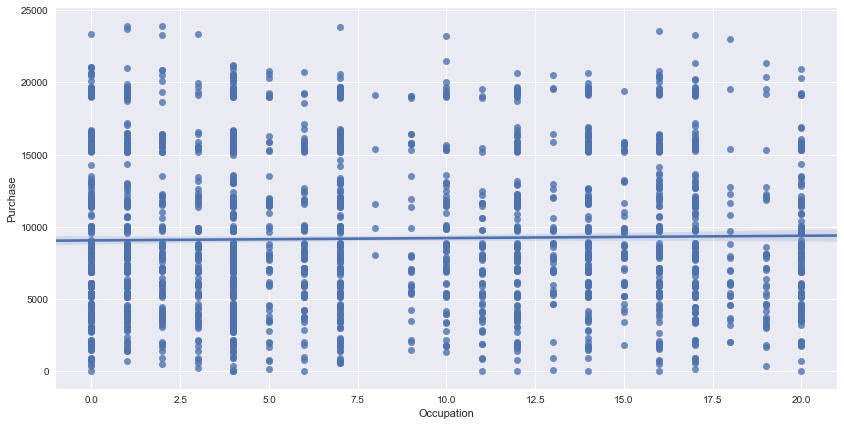

In [15]:
sns.regplot(data.loc[::200, 'Occupation'], data.loc[::200, 'Purchase'])
plt.show()

In [16]:
data = data.drop('User_ID', axis=1)

In [17]:
# print(list(data.Age.unique()))
lb = preprocessing.LabelEncoder()
lb.fit(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
data.Age = lb.transform(data.Age)

In [18]:
# print(list(data.City_Category.unique()))
lb = preprocessing.LabelEncoder()
lb.fit(['A', 'B', 'C'])
data.City_Category = lb.transform(data.City_Category)

In [19]:
# print(data.Stay_In_Current_City_Years.unique())
lb = preprocessing.LabelEncoder().fit(['0', '1', '2', '3', '4+'])
data.Stay_In_Current_City_Years = lb.transform(data.Stay_In_Current_City_Years)

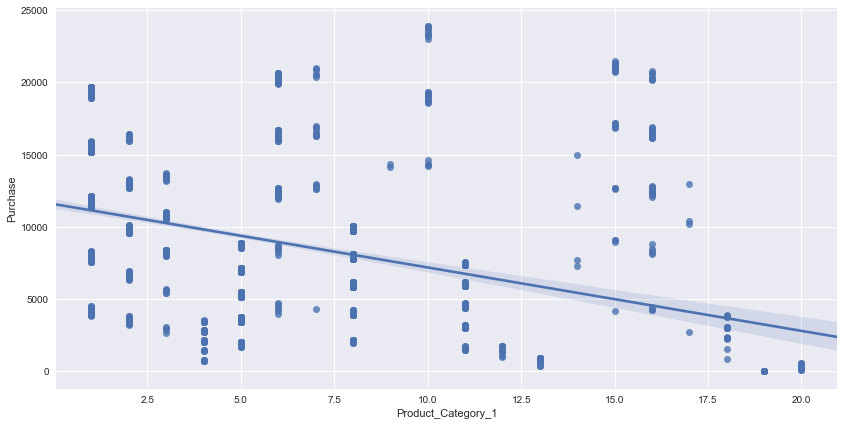

In [20]:
sns.regplot(data.loc[::200, 'Product_Category_1'], data.loc[::200, 'Purchase'])
plt.show()

## Product_Category_1 ++++++

In [21]:
# len(data.Product_ID.unique()) # ==> 3631
pid = data.Product_ID.unique()
# [x for x in pid if x[-2:] == '42']
# ['P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
# data[data.Product_ID == 'P00085442'].Product_Category_2.isnull().unique()
# this 5 Pids P_cat_2 & 3 are null

# data.Product_ID
# set([x[:4] for x in data.Product_ID])
# {'P000', 'P001', 'P002', 'P003', 'P009'}


In [22]:
lb = preprocessing.LabelEncoder().fit(data.Product_ID.unique())
data.Product_ID = lb.transform(data.Product_ID)

In [32]:
data.Product_ID = (data.Product_ID - data.Product_ID.mean()) / data.Product_ID.std()

In [39]:
data = data.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
target = data.Purchase
data = data.drop('Purchase', axis=1)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.01)
model = RandomForestRegressor(n_estimators=150, n_jobs=-1, max_depth=10)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [89]:
model.score(x_test, y_test)

0.68295190700009889